In [2]:
import numpy as np 
import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
from sklearn.svm import SVC

print(os.listdir("C:/Users/bhupe/Desktop/My Project"))
dim = 100

['.ipynb_checkpoints', '3.Fruit_image_classification', '4.Car_number_plate', '5.Food_Recognition', 'car_bicycle', 'Food_Recognition', 'Gender Classification', 'Linear Regression', 'Mask-Detector', 'Untitled.ipynb']


In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [4]:
def getYourFruits(fruits, data_type, print_n=False, k_fold=False):
    images = []
    labels = []
    val = ['Training', 'Test']
    if not k_fold:
        path = "C:/Users/bhupe/Desktop/My Project/*/fruits-360/" + data_type + "/"
        for i,f in enumerate(fruits):
            p = path + f
            j=0
            for image_path in glob.glob(os.path.join(p, "*.jpg")):
                image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                image = cv2.resize(image, (dim, dim))
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                images.append(image)
                labels.append(i)
                j+=1
            if(print_n):
                print("There are " , j , " " , data_type.upper(), " images of " , fruits[i].upper())
        images = np.array(images)
        labels = np.array(labels)
        return images, labels
    else:
        for v in val:
            path = "C:/Users/bhupe/Desktop/My Project/*/fruits-360/" + v + "/"
            for i,f in enumerate(fruits):
                p = path + f
                j=0
                for image_path in glob.glob(os.path.join(p, "*.jpg")):
                    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                    image = cv2.resize(image, (dim, dim))
                    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                    images.append(image)
                    labels.append(i)
                    j+=1
        images = np.array(images)
        labels = np.array(labels)
        return images, labels

In [5]:
def getAllFruits():
    fruits = []
    for fruit_path in glob.glob("C:/Users/bhupe/Desktop/My Project/*/fruits-360/Training/*"):
        fruit = fruit_path.split("/")[-1]
        fruits.append(fruit)
    return fruits

In [6]:
getAllFruits()

['My Project\\3.Fruit_image_classification\\fruits-360\\Training\\Apple Braeburn',
 'My Project\\3.Fruit_image_classification\\fruits-360\\Training\\Apple Crimson Snow',
 'My Project\\3.Fruit_image_classification\\fruits-360\\Training\\Apple Golden 1',
 'My Project\\3.Fruit_image_classification\\fruits-360\\Training\\Apple Golden 2',
 'My Project\\3.Fruit_image_classification\\fruits-360\\Training\\Apple Golden 3',
 'My Project\\3.Fruit_image_classification\\fruits-360\\Training\\Apple Granny Smith',
 'My Project\\3.Fruit_image_classification\\fruits-360\\Training\\Apple Pink Lady',
 'My Project\\3.Fruit_image_classification\\fruits-360\\Training\\Apple Red 1',
 'My Project\\3.Fruit_image_classification\\fruits-360\\Training\\Apple Red 2',
 'My Project\\3.Fruit_image_classification\\fruits-360\\Training\\Apple Red 3',
 'My Project\\3.Fruit_image_classification\\fruits-360\\Training\\Apple Red Delicious',
 'My Project\\3.Fruit_image_classification\\fruits-360\\Training\\Apple Red Yellow

In [7]:
#Choose your Fruits
fruits = ['Apricot','Avocado','Eggplant','Guava','kiwi','Papaya','Pineapple','Strawberry','Watermelon'] #Binary classification

#Get Images and Labels 
X_t, y_train =  getYourFruits(fruits, 'Training', print_n=True, k_fold=False)
X_test, y_test = getYourFruits(fruits, 'Test', print_n=True, k_fold=False)

#Get data for k-fold
#X,y = getYourFruits(fruits, '', print_n=True, k_fold=True)

#Scale Data Images
#flatten the pixels to a single row for each image and constructed a matrix with flattened pixels rows
scaler = StandardScaler()
X_train = scaler.fit_transform([i.flatten() for i in X_t])
X_test = scaler.fit_transform([i.flatten() for i in X_test])
#X = scaler.fit_transform([i.flatten() for i in X])

There are  492   TRAINING  images of  APRICOT
There are  427   TRAINING  images of  AVOCADO
There are  468   TRAINING  images of  EGGPLANT
There are  490   TRAINING  images of  GUAVA
There are  466   TRAINING  images of  KIWI
There are  492   TRAINING  images of  PAPAYA
There are  490   TRAINING  images of  PINEAPPLE
There are  492   TRAINING  images of  STRAWBERRY
There are  475   TRAINING  images of  WATERMELON
There are  164   TEST  images of  APRICOT
There are  143   TEST  images of  AVOCADO
There are  156   TEST  images of  EGGPLANT
There are  166   TEST  images of  GUAVA
There are  156   TEST  images of  KIWI
There are  164   TEST  images of  PAPAYA
There are  166   TEST  images of  PINEAPPLE
There are  164   TEST  images of  STRAWBERRY
There are  157   TEST  images of  WATERMELON


In [11]:
def plot_image_grid(images, rows, columns):
    figure = plt.figure(figsize=(columns * 3, rows * 3))
    for i in range(columns * rows):
        figure.add_subplot(rows, columns, i + 1)
        plt.imshow(images[i])
    plt.show()

In [9]:
type(X_t)

numpy.ndarray

In [10]:
X_t[445:470]

array([[[[255, 253, 250],
         [255, 254, 250],
         [255, 255, 253],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 253, 250],
         [255, 254, 250],
         [255, 255, 253],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 254, 252],
         [255, 255, 253],
         [255, 255, 253],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

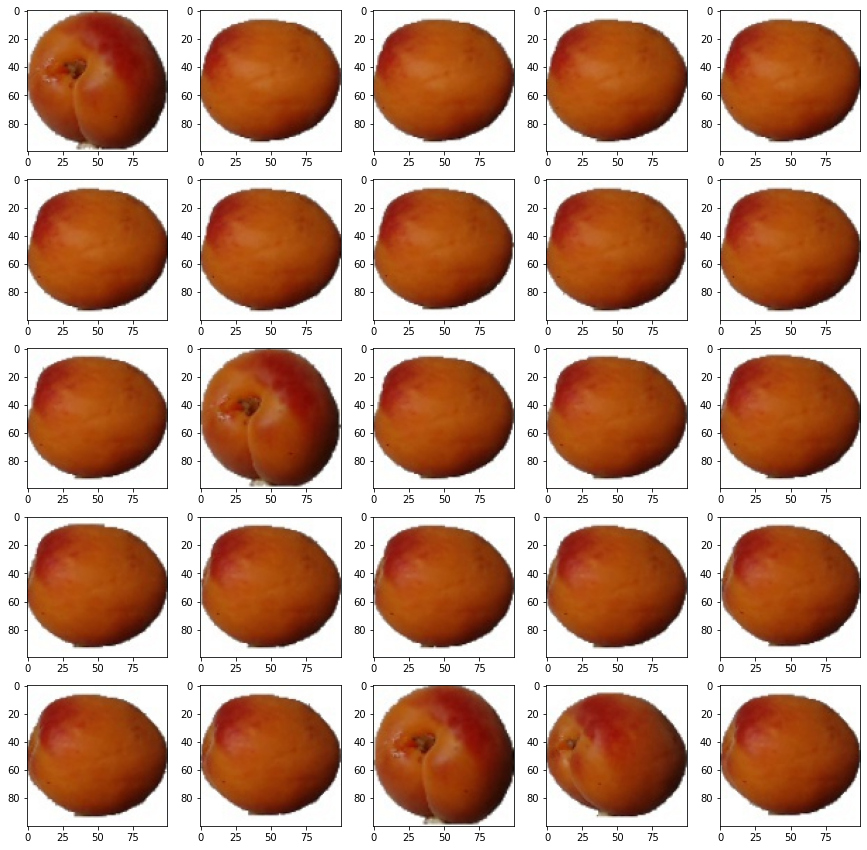

In [12]:

#Slicing a 1D npy array:
#The slice notation specifies a start and end value [start:end] and copies the list from start up to but not including end.
plot_image_grid(X_t[445:470], 5, 5)

### build model

In [26]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len(fruits))
])

### compile the model

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
len(y_train)

4292

In [29]:
len(X_train)

4292

In [30]:
X_t.shape

(4292, 100, 100, 3)

In [31]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
135/135 [==============================] - 6s 36ms/step - loss: 0.5975 - accuracy: 0.9072
Epoch 2/5
135/135 [==============================] - 5s 34ms/step - loss: 0.1281 - accuracy: 0.9923
Epoch 3/5
135/135 [==============================] - 5s 35ms/step - loss: 0.0959 - accuracy: 0.9931
Epoch 4/5
135/135 [==============================] - 4s 32ms/step - loss: 3.2263e-08 - accuracy: 1.0000
Epoch 5/5
135/135 [==============================] - 4s 32ms/step - loss: 9.6060e-09 - accuracy: 1.0000


### evaluate accuracy

In [32]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

45/45 - 2s - loss: 2.4079 - accuracy: 0.9547

Test accuracy: 0.9547353982925415


### Making prediction

In [33]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [34]:
predictions = probability_model.predict(X_test)

In [35]:
predictions[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [36]:
#show the label that model has the highest confidence
np.argmax(predictions[0])

0

In [37]:
#corresbond test set label
y_test[0]

0

### Grahpic Model Result

In [60]:
# write a function to match the actual test image with the predicted label. Show blue if correctly predicted.
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% \n({})".format(fruits[predicted_label],
                                100*np.max(predictions_array),
                                fruits[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(9))
    plt.yticks([])
    thisplot = plt.bar(range(9), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [61]:
X_test, y_test = getYourFruits(fruits, 'Test', print_n=True, k_fold=False)

There are  164   TEST  images of  APRICOT
There are  143   TEST  images of  AVOCADO
There are  156   TEST  images of  EGGPLANT
There are  166   TEST  images of  GUAVA
There are  156   TEST  images of  KIWI
There are  164   TEST  images of  PAPAYA
There are  166   TEST  images of  PINEAPPLE
There are  164   TEST  images of  STRAWBERRY
There are  157   TEST  images of  WATERMELON


In [62]:
len(X_test)

1436

In [63]:
predictions

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.91468924, 0.        ,
        0.08531074],
       [0.        , 0.        , 0.        , ..., 0.9924946 , 0.        ,
        0.00750541],
       [0.        , 0.        , 0.        , ..., 0.2785419 , 0.        ,
        0.72145814]], dtype=float32)

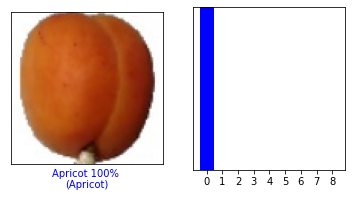

In [67]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], y_test)
plt.show()

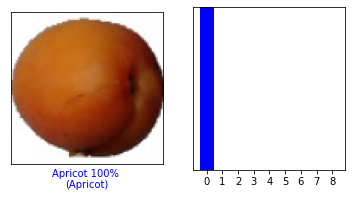

In [68]:
i = 151
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

### shuffle test data

In [69]:
from sklearn.utils import shuffle
X_shuffled,y_shuffled,predictions_shuffled = shuffle(X_test, y_test,predictions, random_state=0)

### plot several images with their predictions

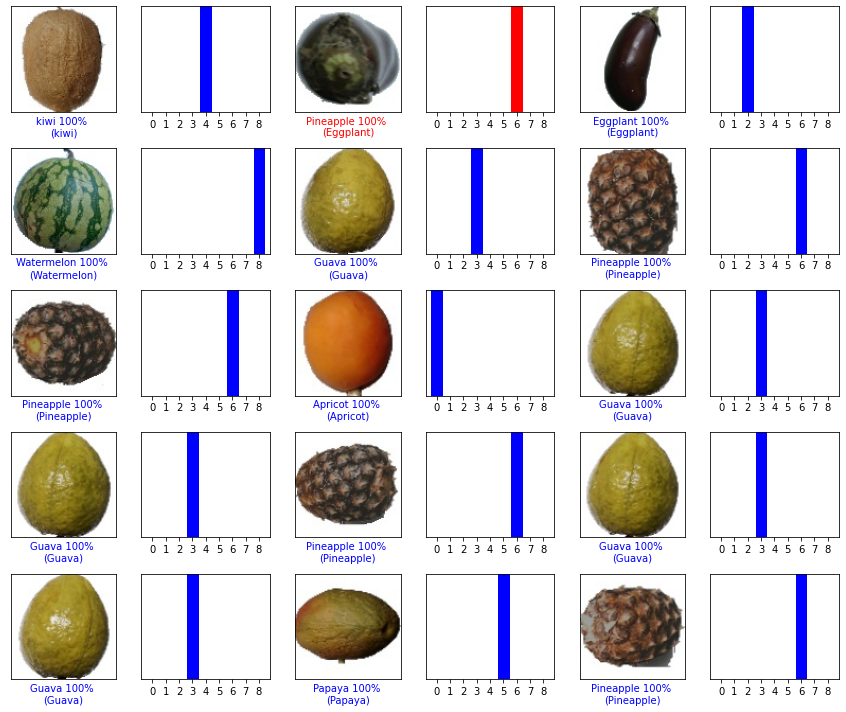

In [71]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions_shuffled[i], y_shuffled, X_shuffled)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions_shuffled[i], y_shuffled)
plt.tight_layout()
plt.savefig('test.png', bbox_inches='tight')
plt.show()

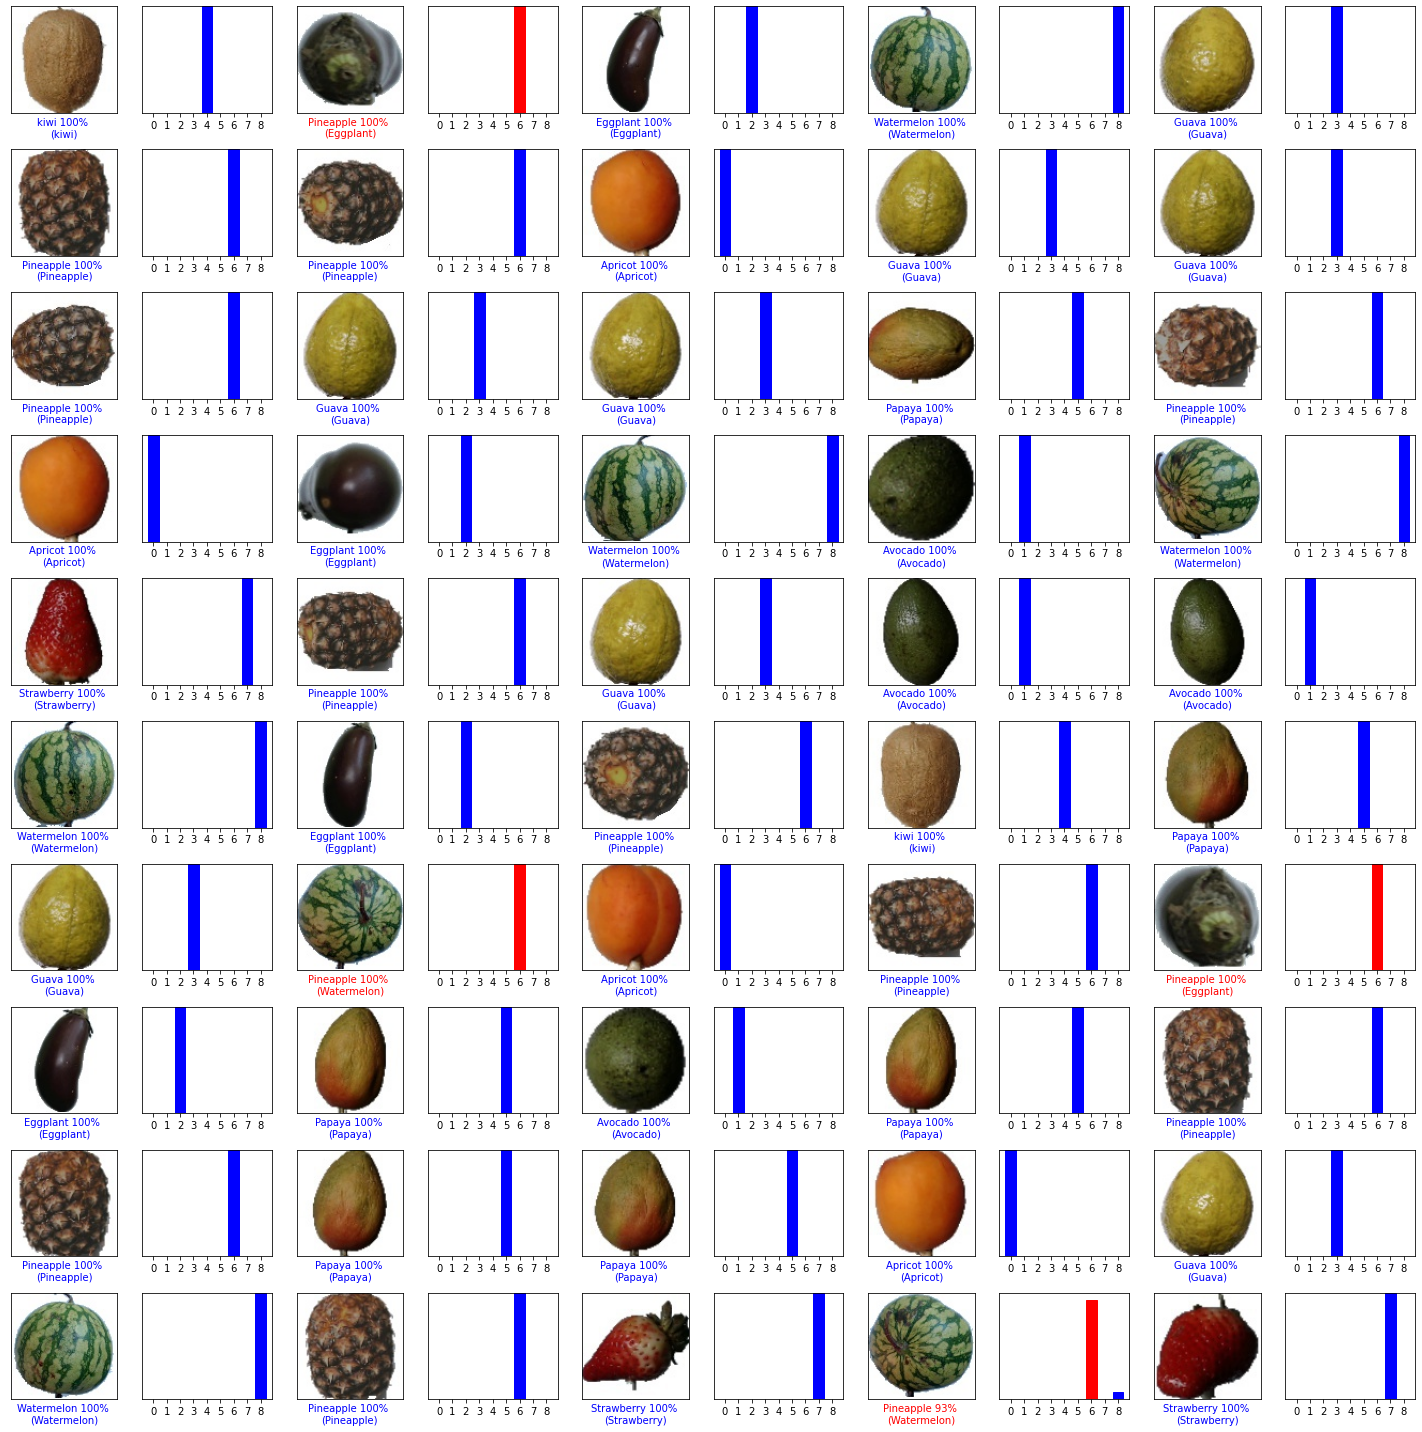

In [73]:
num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions_shuffled[i], y_shuffled, X_shuffled)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions_shuffled[i], y_shuffled)
plt.tight_layout()
plt.savefig('test1.png', bbox_inches='tight')
plt.show()